# Examining some aspects of the "deepening-warming" theory by Bretherton and Wyant, 1997

### Youtong Zheng, Univ. of Maryland

In BW97's theory, the role of surface latent heat flux was highlighted and has been used in many literatures as the core argument of the theory. However, this is only partially correct. Two key lines of argument are also indispensable. The first is the entrainment closure: entrainment rate must adjust itself to be proportional to the vertial integral of buoyancy flux. The second is the cloud-layer energy balance: diabatic cooling (primarily radiative cooling) must balance the entrainment warming. Combination of the two ideas leads to the argument that the vertical integral of buoyancy fluxes remain unchanged or decreases during the cloud transition. If this argument is not valid, the theory does not hold even if the increase in latent heat flux is most likely to be valid. As such, this note attempts to test the two ideas. 

I use the LES simulation of the ASTEX campaign. The model is SAM6.11.6. 

In [88]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os
from scipy.ndimage.interpolation import shift

from matplotlib import cm
%matplotlib inline

In [89]:
#read data
path="C:/Data/ASTEXT_output/3D/OUT_STAT/"

tmp = glob.glob(path + '*cold1.3*.nc')
f13  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '*cold2.6*.nc')
f26  = xr.open_dataset(tmp[0])

f26 = f13

In [90]:
sns.set(context="talk", style="ticks", font_scale=1)
z = f13['z'].values/1000.
t = f13['time'].values
nz = len(z)
nt = len(t)

myfontsize = 16

## Examine buoyancy flux related quantities

In [91]:
def find_zitop(xin, yin):
    posind = np.where(xin > 2)
    indmax = np.amax(posind)

    xout = xin[0:indmax]
    yout = yin[0:indmax] 
    return xout, yout

In [92]:
def area_calc(xin, yin):
    posind = xin >= 0.
    negind = xin < 0.

    posArea = np.trapz(xin[posind], x = yin[posind])
    negArea = np.trapz(xin[negind], x = yin[negind])
    
    return posArea, negArea

## Look at the profiles of TVFLUX

6.039219
4.450724
5.1914525
6.2838583
9.566029


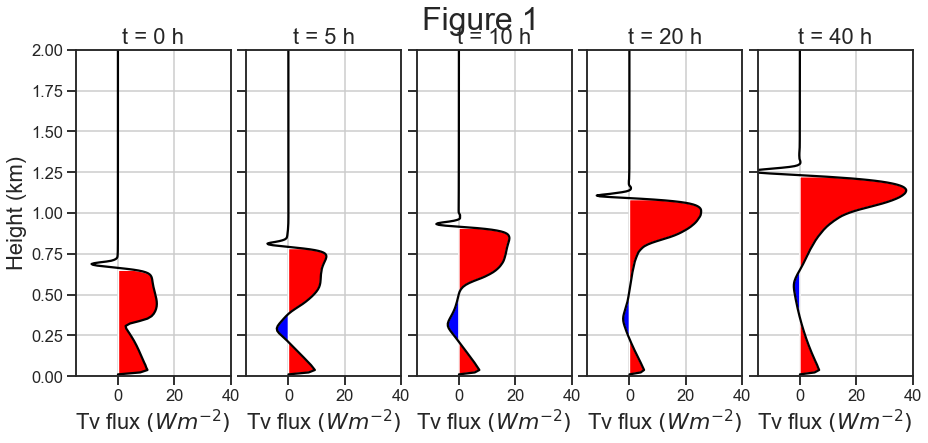

In [106]:
# an  example illustrating how to compute the integral of buoyancy flux
time_use = [0, 5, 10, 20, 40]

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(wspace=.1)

fig.suptitle('Figure 1', fontsize=myfontsize + 10)

axs = axs.ravel()
for i in range(5):
    x = (f26["TVFLUX"].values[time_use[i]])
    y = z
    
    axs[i].plot(x, y, color='black')
    
    axs[i].set_ylim([0., 2])
    axs[i].set_xlim([-15, 40])
    axs[i].set_xlabel('Tv flux $(Wm^{-2})$', fontsize=myfontsize)  # Add an x-label to the axes.
    axs[i].grid(True)
    axs[i].set_title('t = ' + str(time_use[i]) + ' h', fontsize=myfontsize)
        
    x, y = find_zitop(x, y)
        
    area = area_calc(x, y)
    print(area[0] + area[1] )

    axs[i].fill_betweenx(y, 0, x, where=x >= 0, facecolor='red', interpolate=True)
    axs[i].fill_betweenx(y, 0, x, where=x <= 0, facecolor='blue', interpolate=True)
    
    if i > 0:
        axs[i].yaxis.set_major_formatter(plt.NullFormatter())
    
    if i==0:
        axs[i].set_ylabel('Height (km)', fontsize=myfontsize)  # Add a y-label to the axes.
#         axs[i].legend(loc=1, fontsize=18)

## Examine the TVFLUX using another diagnosis

6.0951405

4.576722

5.2137127

7.6435523

9.530819



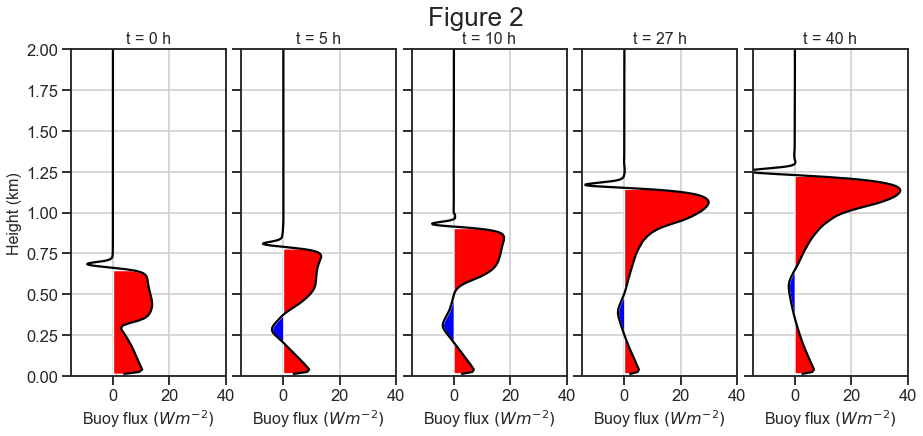

In [94]:
# an  example illustrating how to compute the integral of buoyancy flux
time_use = [0, 5, 10, 27, 40]

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(wspace=.1)
fig.suptitle('Figure 2', fontsize=myfontsize + 10)

axs = axs.ravel()
for i in range(5):
    BUOYA = (f26["BUOYA"].values[time_use[i]] + f26["BUOYAS"].values[time_use[i]]) #m2s-3
    BUOYA = (f26["BUOYA"].values[time_use[i]]) #m2s-3
    thetav = f26["THETAV"].values[time_use[i]] #K
    rho = f26["RHO"].values[time_use[i]] #kg/m3
    
    g = 9.8
    cp     = 1004. 
    
    x = (BUOYA*thetav/g)*rho*cp
    y = z
    
    axs[i].plot(x, y, color='black')
    
    axs[i].set_ylim([0., 2])
    axs[i].set_xlim([-15, 40])
    axs[i].set_xlabel('Buoy flux $(Wm^{-2})$', fontsize=myfontsize)  # Add an x-label to the axes.
    axs[i].grid(True)
    axs[i].set_title('t = ' + str(time_use[i]) + ' h', fontsize=myfontsize)
        
    x, y = find_zitop(x, y)
        
    area = area_calc(x, y)
    print(area[0] + area[1] )
    print()
    
    axs[i].fill_betweenx(y, 0, x, where=x >= 0, facecolor='red', interpolate=True)
    axs[i].fill_betweenx(y, 0, x, where=x <= 0, facecolor='blue', interpolate=True)
    
    if i > 0:
        axs[i].yaxis.set_major_formatter(plt.NullFormatter())
    
    if i==0:
        axs[i].set_ylabel('Height (km)', fontsize=myfontsize)  # Add a y-label to the axes.

### Note
- Fig 1 and 2 agree with each other. TVLUX is believed. 

## Examining the time series of TVFLUX integrals across different levels and BIR

In [95]:
nt = 41
neg_ba = np.zeros(nt) # 'ba' stands for buoyancy flux integral area
pos_ba = np.zeros(nt)

for i in range(nt):
    x = (f26["TVFLUX"].values[i])
    y = z
    
    x, y = find_zitop(x, y)    
    area = area_calc(x, y)
    pos_ba[i] = area[0]
    neg_ba[i] = area[1]

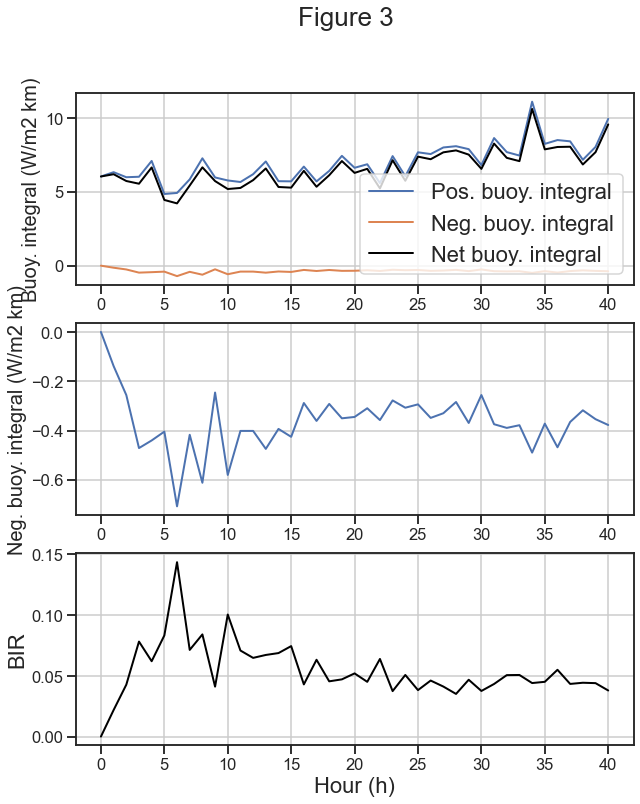

In [96]:
# now we plot
x = np.arange(nt)

fig, (ax, ax2, ax3) = plt.subplots(3,1,figsize=[10, 12])
fig.suptitle('Figure 3', fontsize=myfontsize + 10)
# plt.tight_layout(w_pad=1.0)
fig.subplots_adjust(wspace=.01)
myfontsize = 22
th = np.arange(nt)

ax.plot(x, pos_ba, linewidth=2, label='Pos. buoy. integral')
ax.plot(x, neg_ba, linewidth=2, label='Neg. buoy. integral')
ax.plot(x, pos_ba + neg_ba, color="black", linewidth=2, label='Net buoy. integral')

ax.set_xlabel("", fontsize=myfontsize)
ax.set_ylabel("Buoy. integral (W/m2 km)", fontsize=myfontsize - 2)
ax.legend(loc=0, fontsize=myfontsize)
ax.grid(True)

ax2.plot(x, neg_ba, linewidth=2, label='Neg. buoy. integral')

ax2.set_xlabel("", fontsize=myfontsize)
ax2.set_ylabel("Neg. buoy. integral (W/m2 km)", fontsize=myfontsize - 2)
ax2.grid(True)

ax3.plot(x, -neg_ba/pos_ba, linewidth=2, label='BIR', color = 'black')
ax3.set_xlabel("Hour (h)", fontsize=myfontsize)
ax3.set_ylabel("BIR", fontsize=myfontsize)
ax3.grid(True)

# plt.tight_layout(w_pad=1.0)

### Note
- BIR initially increases, which is consistent with BR97. However after 5 hr, it decreases gradually even though the boundary layer decoupling enhances over time.

## Let's look at the degree of stratification

In [97]:
# To calculate the values at the stratocumulus base height, cloud top and inversion base height
def get_hgt3(var, cld, thl2):

    # z_bottom
    zb_ind = 0
    for k in np.arange(nz)[::-1]:
        if (cld[k] > 0.5):
            zb_ind = k
    var_b = var[zb_ind]

    # z_top, same as z_plus (i.e., inversion top height)
    thl2_max_ind=np.argmax(thl2)
    thl2_max = thl2[thl2_max_ind]
    for i in np.arange(thl2_max_ind,nz,1):
        if (thl2[i] > 0.05*thl2_max ):
            zp_ind = i
    var_t = var[zp_ind]+(thl2_max*0.05-thl2[zp_ind])/(thl2[zp_ind+1]-thl2[zp_ind])*(var[zp_ind+1]-var[zp_ind])

    # z_minus, inversion base height
    # zm_ind = 0
    for i in np.arange(0,thl2_max_ind,1)[::-1]:
        if (thl2[i] > 0.05*thl2_max ):
            zm_ind = i
    var_m = var[zm_ind]+(thl2_max*0.05-thl2[zm_ind])/(thl2[zm_ind-1]-thl2[zm_ind])*(var[zm_ind-1]-var[zm_ind])

    return var_t, var_b, var_m

In [98]:
# To calculate the stratifications
def get_strat(var, z_in, zi_in):
    #bottom 10%
    index = (z_in < 0.1*zi_in)
    var_bot = np.average(var[index])
    
    #top 10%
    index = (z_in < zi_in)&(z_in > 0.9*zi_in)
    var_top = np.average(var[index])
    
    return var_top - var_bot

In [99]:
# compute scaling parameters
nt = 41
zinvb = np.zeros(nt)
zb = np.zeros(nt)
thetal_vmean = np.zeros(nt)
qt_vmean = np.zeros(nt)
qtflux_vmean = np.zeros(nt)

for ii in np.arange(nt):
    
    cld = f26['CLD'].values[ii,:] # cloud fraction
    thl2 = f26['THL2'].values[ii,:] 
    thl  = f26['THETAL'].values[ii,:] 
    qt   = f26['QT'].values[ii,:] 
    qtflux   = f26['QTFLUX'].values[ii,:] 
    tmp,zb[ii],zinvb[ii] = get_hgt3(z, cld, thl2)
    ind = (z < zinvb[ii])
    thetal_vmean[ii] = np.average(thl[ind])
    qt_vmean[ii] = np.average(qt[ind])
    qtflux_vmean[ii] = np.average(qtflux[ind])

In [100]:
nt = 41
delta_thetal = np.zeros(nt) # 'ba' stands for buoyancy flux integral area
delta_qt = np.zeros(nt)

for i in range(nt):
    x = (f26["THETAL"].values[i])
    y = z
    delta_thetal[i] = get_strat(x, y, zinvb[i])    
    
    x = (f26["QT"].values[i])
    delta_qt[i] = get_strat(x, y, zinvb[i])    

In [101]:
delta_thetal

array([-0.07629395,  0.02438354,  0.13967896,  0.22012329,  0.31109619,
        0.44778442,  0.54141235,  0.55484009,  0.60385132,  0.64486694,
        0.69836426,  0.75119019,  0.75979614,  0.759552  ,  0.79351807,
        0.80737305,  0.8079834 ,  0.81768799,  0.81002808,  0.80444336,
        0.79342651,  0.78302002,  0.76809692,  0.75354004,  0.75372314,
        0.72567749,  0.72521973,  0.70248413,  0.69320679,  0.69525146,
        0.68005371,  0.6255188 ,  0.6133728 ,  0.59170532,  0.59103394,
        0.60372925,  0.62619019,  0.60726929,  0.57489014,  0.53955078,
        0.55612183])

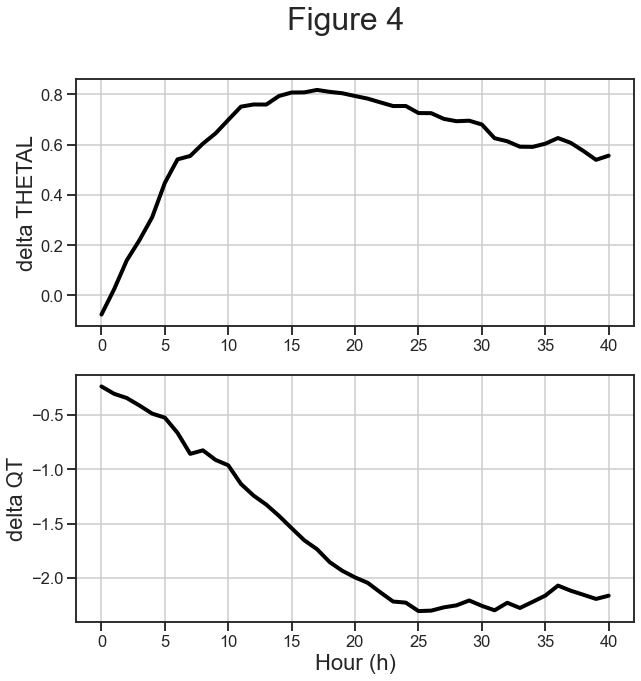

In [102]:
# now we plot
x = np.arange(nt)

fig, (ax, ax2) = plt.subplots(2,1,figsize=[10, 10])
fig.suptitle('Figure 4', fontsize=myfontsize + 10)
fig.subplots_adjust(wspace = .01)
myfontsize = 22
th = np.arange(nt)

ax.plot(x, delta_thetal, linewidth=4, color = 'black')
ax.set_xlabel("", fontsize=myfontsize)
ax.set_ylabel("delta THETAL", fontsize=myfontsize)
ax.grid(True)

ax2.plot(x, delta_qt, linewidth=4, color = 'black')
ax2.set_xlabel("Hour (h)", fontsize=myfontsize)
ax2.set_ylabel("delta QT", fontsize=myfontsize)
ax2.grid(True)

# plt.tight_layout(w_pad=0.0)

### Note
   - The boundary layer becomes increasingly stably stratified at t = 0 ~ 20 h, after which the stratification saturates. 
   - However, the BIR decreases at t = 5 ~ 20 h and remains small after that (Fig. 3). This suggests that the BIR is not related to the boundary layer stratification.
   - However, this raises another question: which quantity better measures the cloud-surface decoupling: BIR or stable stratification?
   - Answer the the question depends on how to define the cloud-surface decoupling.

## Let's look at the ratio of moisture flux between cloud base and surface

In [103]:
# compute cloud base moisture flux
LHF_sfc = f26['LHF'].values[0:41] 
LHF_base = np.zeros(nt)
for ii in np.arange(nt):
    zt0 = zinvb[ii]
    zb0 = zb[ii]

    qtflux   = f26['QTFLUX'].values[ii,:] 
    # To calculate the values at the stratocumulus base height, zb
    def get_cld_var2(var):
        var_t = np.interp(zt0, z, var)
        var_b = np.interp(zb0, z, var)
        return var_t,var_b

    ### Base ###
    qtf_zt, qtf_zb   = get_cld_var2(qtflux)
    
    LHF_base[ii] = qtf_zb

In [104]:
print(LHF_base/LHF_sfc)

[0.53767953 0.86312953 0.95002081 1.1051702  1.32796019 1.0081462
 0.83605607 1.00956377 1.58238954 0.98889474 1.08168588 0.87823023
 1.00593592 1.20943809 0.90114462 0.79088589 1.05326798 0.81416027
 0.92249893 1.13717768 0.94041312 0.92421103 0.70432662 1.0532787
 0.79645643 1.02829187 1.10061912 1.01936128 1.01431013 0.97453692
 0.78760682 0.97801169 0.90247382 0.8588113  1.40108564 0.84871172
 0.95368575 0.831167   0.70574393 0.80734854 1.07864845]


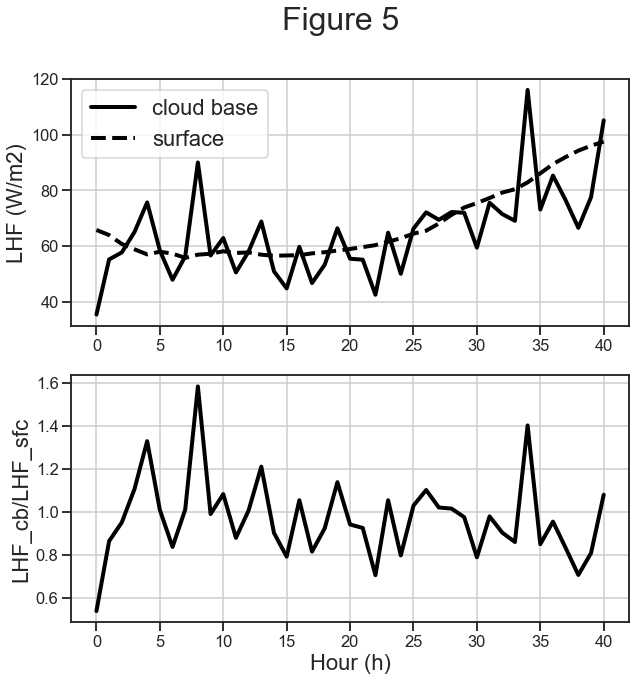

In [105]:
x = np.arange(nt)

fig, (ax, ax2) = plt.subplots(2,1,figsize=[10, 10])
fig.suptitle('Figure 5', fontsize=myfontsize + 10)
fig.subplots_adjust(wspace = .01)
myfontsize = 22
th = np.arange(nt)

ax.plot(x, LHF_base, linewidth=4, color = 'black', label = 'cloud base')
ax.plot(x, LHF_sfc, linewidth=4, color = 'black', linestyle='--', label = 'surface')

ax.set_xlabel("", fontsize=myfontsize)
ax.set_ylabel("LHF (W/m2)", fontsize=myfontsize)
ax.legend(loc=0, fontsize=myfontsize)
ax.grid(True)

ax2.plot(x, LHF_base/LHF_sfc, linewidth=4, color = 'black')
ax2.set_xlabel("Hour (h)", fontsize=myfontsize)
ax2.set_ylabel("LHF_cb/LHF_sfc", fontsize=myfontsize)
ax2.grid(True)